In [1]:
import networkx as nx
import Complexity as cx
import matplotlib.pyplot as plt
import utilities as ut
import numpy as np
import matplotlib as mpl
from math import log

In [2]:
methods = ["C1est","C1espec","C2espec","OdC","MAg","Cr","Ce","MAri"]

In [3]:
#Generates random graphs and data
n=7
graphs,df = ut.random_networks(n=n,use_all_m = True,sample_number = 50)

In [4]:
#Find the complexities of the graphs
results = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in graphs]
    results.append(temp_result)

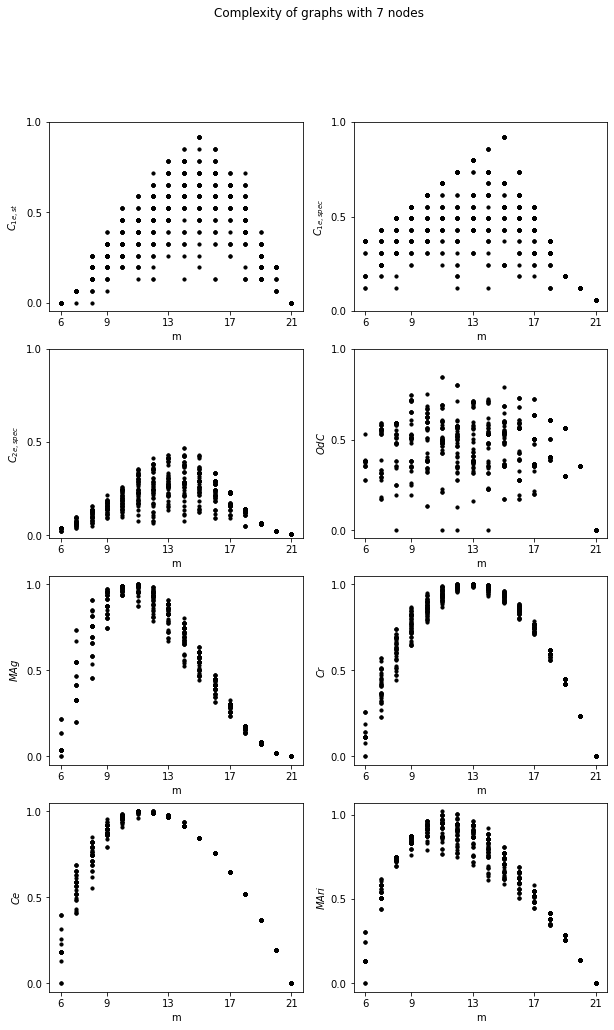

In [5]:
n=7
c=0
fig,axes = plt.subplots(4,2,figsize = (10,16))
xticks = np.linspace(n-1,n*(n-1)/2,5)
xticks = [int(item) for item in xticks]
for i in range(4):
    for j in range(2):
        axes[i][j].scatter(df["Number_of_edges"],results[c],s=10,color = "black")
        axes[i][j].set_yticks([0,0.5,1])
        axes[i][j].set_xticks(xticks)
        axes[i][j].set_xlabel("m")
        axes[i][j].set_ylabel("$"+methods[c]+"$")
        c+=1
axes[0][0].set_ylabel("$C_{1e,st}$")
axes[0][1].set_ylabel("$C_{1e,spec}$")
axes[1][0].set_ylabel("$C_{2e,spec}$")
plt.suptitle("Complexity of graphs with 7 nodes")
plt.show()

<ipython-input-6-27302fd9ba9f>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


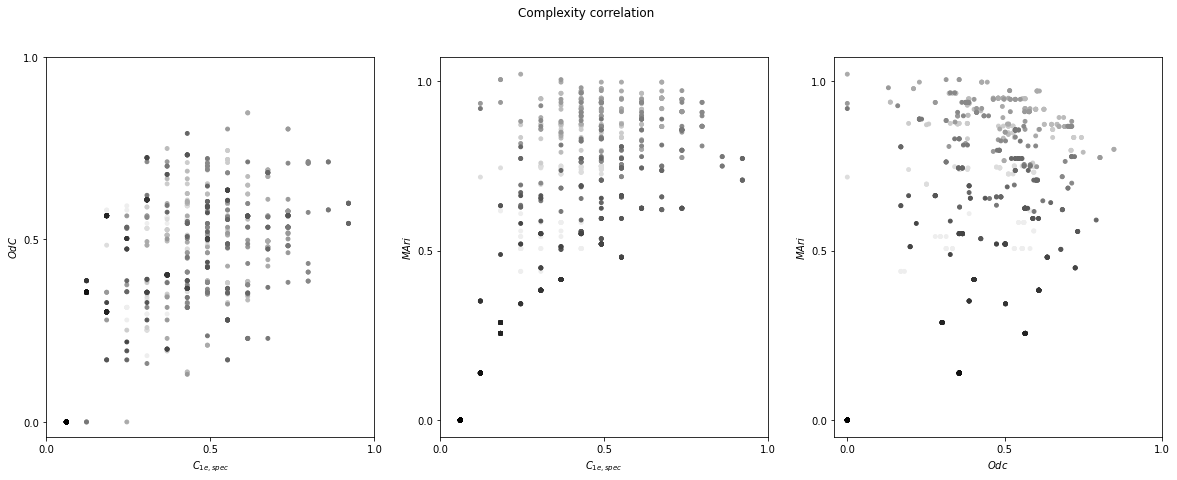

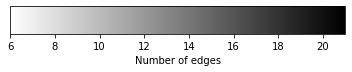

In [6]:
fig,axes = plt.subplots(1,3,figsize =(20,7))
axes[0].scatter(results[1],results[3],s=15,c = df["Number_of_edges"],cmap = "binary");axes[0].set_xlabel("$C_{1e,spec}$");axes[0].set_ylabel("$OdC$");
axes[1].scatter(results[1],results[7],s=15,c = df["Number_of_edges"],cmap = "binary");axes[1].set_xlabel("$C_{1e,spec}$");axes[1].set_ylabel("$MAri$");
axes[2].scatter(results[3],results[7],s=15,c = df["Number_of_edges"],cmap = "binary");axes[2].set_xlabel("$Odc$");axes[2].set_ylabel("$MAri$");
for i in range(len(axes)):
    axes[i].set_xticks([0,0.5,1])
    axes[i].set_yticks([0,0.5,1])
plt.suptitle("Complexity correlation")
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.binary
norm = mpl.colors.Normalize(vmin=(n-1), vmax=(n-1)*n/2)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Number of edges')
fig.show()

Text(0, 0.5, 'L/Lr')

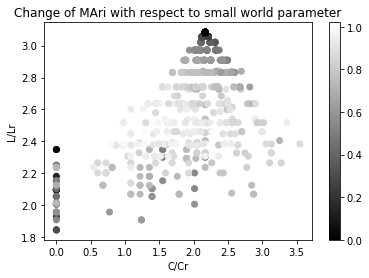

In [7]:
clusters = [nx.average_clustering(g) for g in graphs]
distances = [nx.average_shortest_path_length(g) for g in graphs]
Cr = [len(g.edges)/(n*(n-1/2)) for g in graphs]
Lr = [log(n)/(2*len(g.edges)/n) for g in graphs]
c_ratio = [item/item1 for item,item1 in zip(clusters,Cr)]
l_ratio = [item/item1 for item,item1 in zip(distances,Lr)]
plt.scatter(c_ratio,l_ratio, c = results[7],cmap = "gray")
plt.colorbar()
plt.title("Change of MAri with respect to small world parameter")
plt.xlabel("C/Cr")
plt.ylabel("L/Lr")

In [8]:
#Generates special random graphs
n = 20
randoms,random_df = ut.random_networks(n,False,500)
BA_graphs = ut.BA_random_graphs(n=n,sample_number = 100)
WS_graphs = ut.WS_random_graphs(n=n,sample_number = 100)
NW_graphs = ut.NW_random_graphs(n=n,sample_number = 100)

In [14]:
#Calculates the complexity of special random graphs
rd_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in randoms]
    rd_result.append(temp_result)
BA_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in BA_graphs]
    BA_result.append(temp_result)

WS_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in WS_graphs]
    WS_result.append(temp_result)

NW_result = []
for item in methods:
    method = getattr(cx,item)
    temp_result = [method(g) for g in NW_graphs]
    NW_result.append(temp_result)

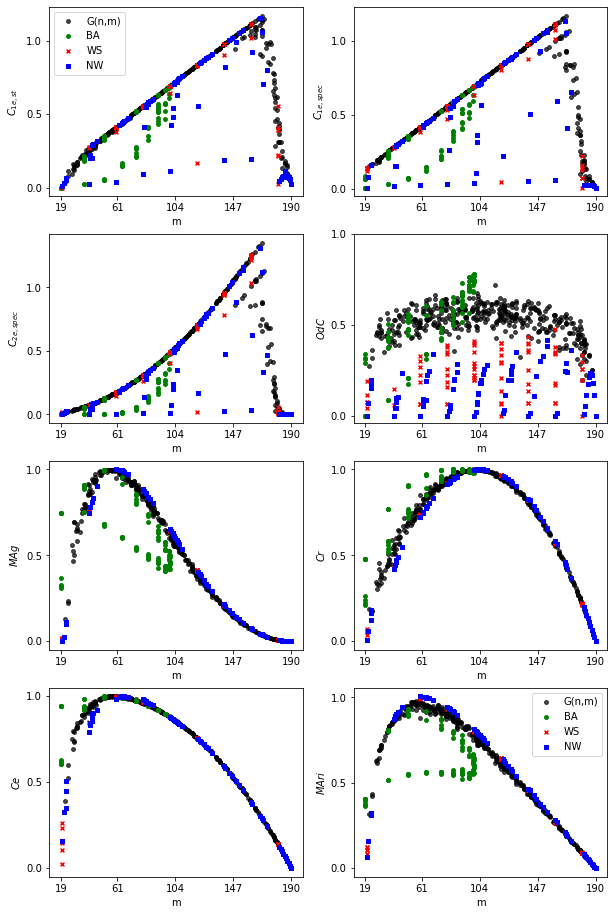

In [15]:
# Calculates the complexities of special graphs
n=20
c=0
fig,axes = plt.subplots(4,2,figsize = (10,16))
xticks = np.linspace(n-1,n*(n-1)/2,5)
xticks = [int(item) for item in xticks]
for i in range(4):
    for j in range(2):
        axes[i][j].scatter([len(g.edges) for g in randoms],rd_result[c],s=15,color = "black",alpha = 0.7,label = "G(n,m)")
        axes[i][j].scatter([len(g.edges) for g in BA_graphs],BA_result[c],s=15,color = "green",label = "BA")
        axes[i][j].scatter([len(g.edges) for g in WS_graphs],WS_result[c],marker = "x",s=15,color = "red",label = "WS")
        axes[i][j].scatter([len(g.edges) for g in NW_graphs],NW_result[c],marker = "s",s=15,color = "blue",label = "NW")
        axes[i][j].set_yticks([0,0.5,1])
        axes[i][j].set_ylabel("$"+methods[c]+"$")
        axes[i][j].set_xlabel("m")
        axes[i][j].set_xticks(xticks)
        c+=1
axes[0][0].set_ylabel("$C_{1e,st}$")
axes[0][1].set_ylabel("$C_{1e,spec}$")
axes[1][0].set_ylabel("$C_{2e,spec}$")
axes[0][0].legend()
plt.legend()
plt.show()

In [16]:
#Analyse Complement graphs complexity
graphs,df = ut.random_networks(25,False,500)
complement_graphs = [ut.complement_graph(g) for g in graphs]
c = []
g = []
edges = []
for i in range(len(complement_graphs)):
    if complement_graphs[i] !=None:
        c.append(complement_graphs[i])
        g.append(graphs[i])
        edges.append(df["Number_of_edges"][i])

Text(0, 0.5, '$MAri$ of complement graph')

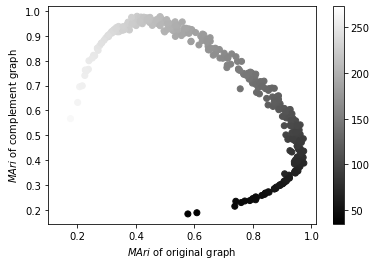

In [17]:
results = [cx.MAri(item) for item in g]
results_c = [cx.MAri(g) for g in c]
plt.scatter(results,results_c,c = edges,cmap="gray")
plt.colorbar()
plt.xlabel("$MAri$ of original graph")
plt.ylabel("$MAri$ of complement graph")

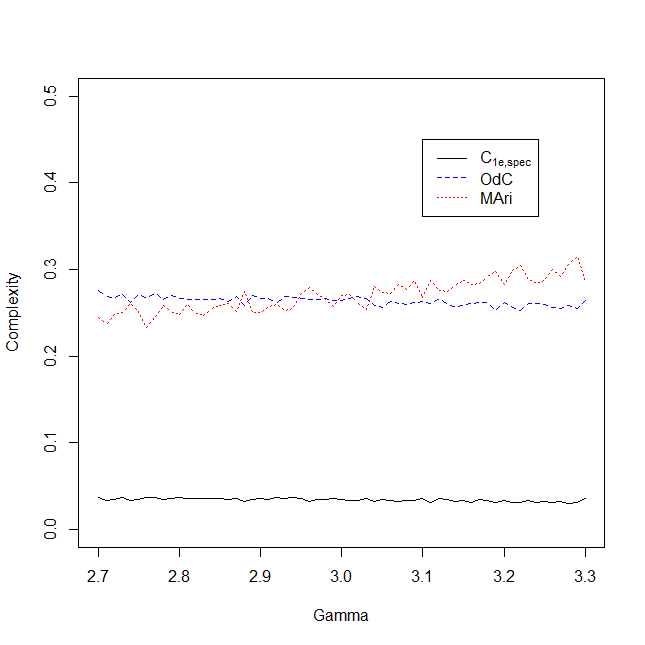

In [23]:
from IPython import display
display.Image("./thesis/figures/configuration_model.png")